# Importing Data & Libraries

In [15]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from config import *

club_games_df = pd.read_csv(f"{folder_path}/club_games.csv")

# Data Preparation of Club Games

In [16]:
club_games_df.shape

(130432, 11)

In [17]:
club_games_df.head(10)

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2221751,431,1,NaN,Lutz Göttling,60,2,NaN,Christian Streich,Home,0
1,2221755,83,3,NaN,Ralph Hasenhüttl,4795,0,NaN,Tomas Oral,Home,1
2,2222597,3725,2,2.0,Stanislav Cherchesov,232,1,5.0,Unai Emery,Home,1
3,2222627,2696,0,11.0,Andrey Kobelev,4128,2,10.0,Rustem Khuzin,Home,0
4,2222658,2410,0,2.0,Leonid Slutski,121,2,13.0,Dan Petrescu,Home,0
5,2222664,932,1,5.0,Slaven Bilic,2698,0,8.0,Kurban Berdyev,Home,1
6,2222683,2696,0,11.0,Andrey Kobelev,12438,1,16.0,Gadzhi Gadzhiev,Home,0
7,2222685,2698,0,7.0,Kurban Berdyev,232,1,5.0,Valeriy Karpin,Home,0
8,2222709,3725,2,5.0,Stanislav Cherchesov,11126,1,16.0,Fedor Shcherbachenko,Home,1
9,2222734,1083,2,11.0,Miodrag Bozovic,16704,3,10.0,Slavoljub Muslin,Home,0


In [18]:
duplicates = club_games_df[club_games_df.duplicated(subset= ['game_id'], keep = False)]

duplicates

# le partite sono tutte doppie (con club ed opponent scambiati)sono viste dal punto di vista della squadra di casa e di quella in trasferta


,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2221751,431,1,NaN,Lutz Göttling,60,2,NaN,Christian Streich,Home,0
1,2221755,83,3,NaN,Ralph Hasenhüttl,4795,0,NaN,Tomas Oral,Home,1
2,2222597,3725,2,2.0,Stanislav Cherchesov,232,1,5.0,Unai Emery,Home,1
3,2222627,2696,0,11.0,Andrey Kobelev,4128,2,10.0,Rustem Khuzin,Home,0
4,2222658,2410,0,2.0,Leonid Slutski,121,2,13.0,Dan Petrescu,Home,0
...,...,...,...,...,...,...,...,...,...,...,...
130427,4126931,20923,2,NaN,Sergey Perednya,12065,1,NaN,Aleksandr Gorbachev,Away,1
130428,4148237,920,0,NaN,Ruaidhri Higgins,10481,1,NaN,Milic Curcic,Away,0
130429,4171268,681,2,NaN,Imanol Alguacil,409,0,NaN,Gerhard Struber,Away,1
130430,4148252,144,3,NaN,Sergej Jakirovic,10532,1,NaN,Dan Brimsvík,Away,1


In [19]:
club_games_df = club_games_df.set_index('game_id')
club_games_df.head(10)

,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
game_id,,,,,,,,,,
2221751,431,1,NaN,Lutz Göttling,60,2,NaN,Christian Streich,Home,0
2221755,83,3,NaN,Ralph Hasenhüttl,4795,0,NaN,Tomas Oral,Home,1
2222597,3725,2,2.0,Stanislav Cherchesov,232,1,5.0,Unai Emery,Home,1
2222627,2696,0,11.0,Andrey Kobelev,4128,2,10.0,Rustem Khuzin,Home,0
2222658,2410,0,2.0,Leonid Slutski,121,2,13.0,Dan Petrescu,Home,0
2222664,932,1,5.0,Slaven Bilic,2698,0,8.0,Kurban Berdyev,Home,1
2222683,2696,0,11.0,Andrey Kobelev,12438,1,16.0,Gadzhi Gadzhiev,Home,0
2222685,2698,0,7.0,Kurban Berdyev,232,1,5.0,Valeriy Karpin,Home,0
2222709,3725,2,5.0,Stanislav Cherchesov,11126,1,16.0,Fedor Shcherbachenko,Home,1


In [20]:
# renaming columns
club_games_df = club_games_df.rename(columns= {
    'own_goals' : 'club_goals',
    'own_position' : 'club_position',
    'own_manager_name':'club_manager_name'
})

club_games_df

,club_id,club_goals,club_position,club_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
game_id,,,,,,,,,,
2221751,431,1,NaN,Lutz Göttling,60,2,NaN,Christian Streich,Home,0
2221755,83,3,NaN,Ralph Hasenhüttl,4795,0,NaN,Tomas Oral,Home,1
2222597,3725,2,2.0,Stanislav Cherchesov,232,1,5.0,Unai Emery,Home,1
2222627,2696,0,11.0,Andrey Kobelev,4128,2,10.0,Rustem Khuzin,Home,0
2222658,2410,0,2.0,Leonid Slutski,121,2,13.0,Dan Petrescu,Home,0
...,...,...,...,...,...,...,...,...,...,...
4126931,20923,2,NaN,Sergey Perednya,12065,1,NaN,Aleksandr Gorbachev,Away,1
4148237,920,0,NaN,Ruaidhri Higgins,10481,1,NaN,Milic Curcic,Away,0
4171268,681,2,NaN,Imanol Alguacil,409,0,NaN,Gerhard Struber,Away,1


In [21]:
club_games_df.isna().sum()

# Le righe con position==NaN sono quelle che descrivono le prime partite delle due squadre, dove quindi non hanno una posizione in classifica ancora, oppure partite di coppa in cui non c'è la posizione

club_id                      0
club_goals                   0
club_position            38908
club_manager_name         1484
opponent_id                  0
opponent_goals               0
opponent_position        38908
opponent_manager_name     1484
hosting                      0
is_win                       0
dtype: int64

In [22]:
# setting NA position values to 0

club_games_df.loc[club_games_df['club_position'].isna(), 'club_position'] = 0

club_games_df.loc[club_games_df['opponent_position'].isna(), 'opponent_position'] = 0

club_games_df.isna().sum()

club_id                     0
club_goals                  0
club_position               0
club_manager_name        1484
opponent_id                 0
opponent_goals              0
opponent_position           0
opponent_manager_name    1484
hosting                     0
is_win                      0
dtype: int64

In [23]:
club_games_df.loc[club_games_df.duplicated()]

# ci sono duplicati perchè è possibile che due squadre giochino più volte una contro l'altra e con lo stesso risultato e gli stessi altri valori

,club_id,club_goals,club_position,club_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
game_id,,,,,,,,,,
3038747,418,3,0.0,Zinédine Zidane,31,1,0.0,Jürgen Klopp,Home,1
4173721,44914,1,0.0,Ricky Waddell,23616,2,0.0,Mark Cowie,Home,0
2495367,27,3,0.0,Pep Guardiola,2410,0,0.0,Leonid Slutski,Home,1
2486736,512,1,10.0,Mark Hughes,3008,0,15.0,Steve Bruce,Home,1
2849034,660,1,1.0,Paulo Fonseca,23611,1,4.0,Roman Sanzhar,Home,0
2847145,2578,1,4.0,Tommy Wright,43,0,5.0,Ian Cathro,Home,1
3376110,28097,2,0.0,Andrey Zakharov,12065,3,0.0,Aleksandr Akimov,Home,0
3651120,31,2,0.0,Jürgen Klopp,720,0,0.0,Sérgio Conceição,Home,1
2846713,23611,1,4.0,Roman Sanzhar,6992,0,6.0,Oleksandr Babych,Home,1


In [24]:
club_games_df.dtypes

club_id                    int64
club_goals                 int64
club_position            float64
club_manager_name         object
opponent_id                int64
opponent_goals             int64
opponent_position        float64
opponent_manager_name     object
hosting                   object
is_win                     int64
dtype: object

In [25]:
club_games_df['is_win'] = club_games_df['is_win'].replace({1: True, 0: False})

club_games_df['is_win'] = club_games_df['is_win'].astype(bool)

club_games_df

,club_id,club_goals,club_position,club_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
game_id,,,,,,,,,,
2221751,431,1,0.0,Lutz Göttling,60,2,0.0,Christian Streich,Home,False
2221755,83,3,0.0,Ralph Hasenhüttl,4795,0,0.0,Tomas Oral,Home,True
2222597,3725,2,2.0,Stanislav Cherchesov,232,1,5.0,Unai Emery,Home,True
2222627,2696,0,11.0,Andrey Kobelev,4128,2,10.0,Rustem Khuzin,Home,False
2222658,2410,0,2.0,Leonid Slutski,121,2,13.0,Dan Petrescu,Home,False
...,...,...,...,...,...,...,...,...,...,...
4126931,20923,2,0.0,Sergey Perednya,12065,1,0.0,Aleksandr Gorbachev,Away,True
4148237,920,0,0.0,Ruaidhri Higgins,10481,1,0.0,Milic Curcic,Away,False
4171268,681,2,0.0,Imanol Alguacil,409,0,0.0,Gerhard Struber,Away,True


In [26]:
club_games_df['club_goals'].describe()

count    130432.000000
mean          1.457365
std           1.402178
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          19.000000
Name: club_goals, dtype: float64

In [28]:
club_games_df['opponent_goals'].describe()

# si può notare che club_goals e opponent_goals hanno gli stessi valori, sempre perchè le partite sono duplicate (viste dal punto di vista della squadra in casa e da quella in trasferta)

count    130432.000000
mean          1.457365
std           1.402178
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          19.000000
Name: opponent_goals, dtype: float64

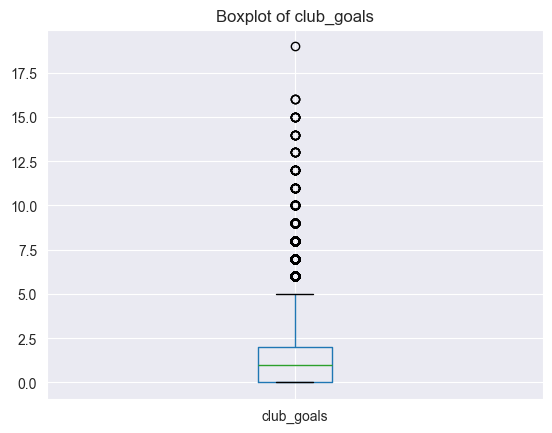

In [31]:
ax = club_games_df.boxplot(column='club_goals')
ax.set_title('Boxplot of club_goals')
plt.show()

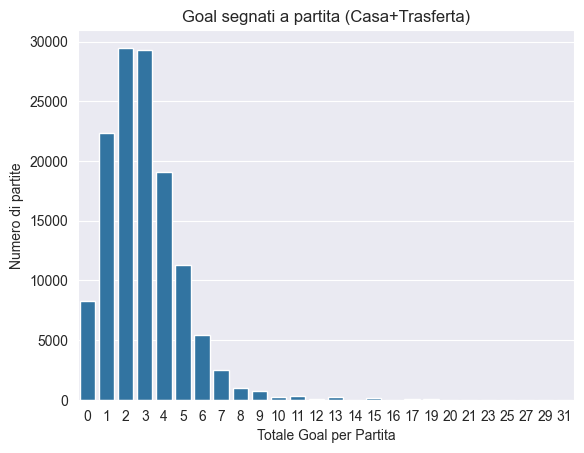

In [37]:
# Aggiunge la colonna Goal Totali
club_games_df['total_goals'] = club_games_df['club_goals'] + club_games_df['opponent_goals']

# Countplot
sns.countplot(x='total_goals', data=club_games_df)

plt.xlabel('Totale Goal per Partita')
plt.ylabel('Numero di partite')
plt.title('Goal segnati a partita (Casa+Trasferta)')
plt.show()

# Saving processed data to feather file

In [39]:
club_games_df.to_feather('../cleaned_data/club_games.feather')

# FINE

# Data Analysis & Visualization

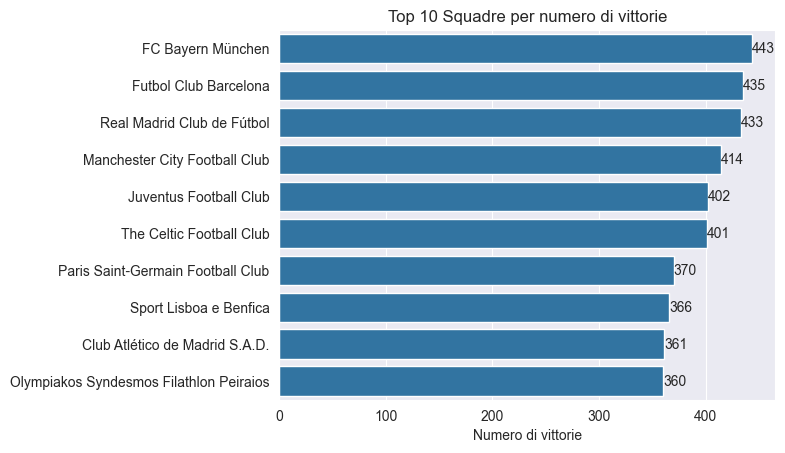

In [11]:
# top 10 squadre per numero di vittorie
club_wins = club_games_df[club_games_df['is_win'] == True]['club_id'].value_counts().head(10)

club_name_wins = pd.merge(club_wins, clubs_df, left_index=True, right_on='club_id')

ax = sns.barplot(data=club_name_wins, y='name', x='count')

for i, (value, name) in enumerate(zip(club_name_wins['count'], club_name_wins['name'])):
    ax.text(value, i, f"{value}", ha="left", va='center')
    
plt.title('Top 10 Squadre per numero di vittorie')
plt.xlabel('Numero di vittorie')
plt.ylabel('')
plt.show()

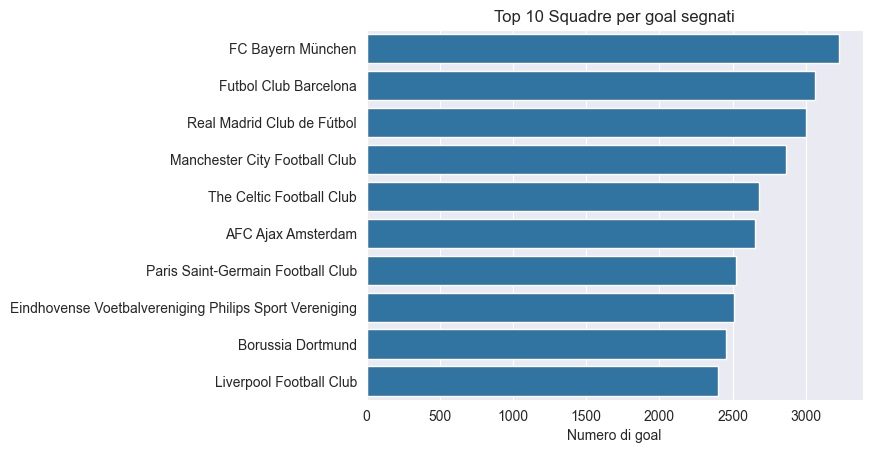

In [12]:
# top 10 squadre per numero di goal segnati

club_goals = pd.DataFrame()
club_goals['goals'] = club_games_df.groupby('club_id')['club_goals'].sum() + club_games_df.groupby('opponent_id')['opponent_goals'].sum()

club_goals = club_goals.sort_values(ascending=False, by='goals').head(10)

top10_goals = pd.merge(club_goals, clubs_df, left_index=True, right_on='club_id')

ax = sns.barplot(data=top10_goals, y='name', x='goals')
plt.title('Top 10 Squadre per goal segnati')
plt.xlabel('Numero di goal')
plt.ylabel('')
plt.show()


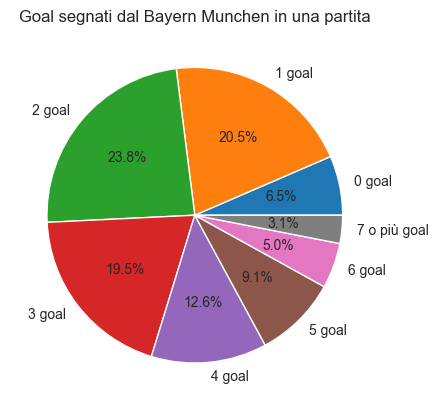

In [13]:
# distribuzione del numero di goal segnati da una singola squadra per partita 

bayern_games = club_games_df.query('club_id == 27')

goal_0 = bayern_games['club_goals'].value_counts()[0]
goal_1 = bayern_games['club_goals'].value_counts()[1]
goal_2 = bayern_games['club_goals'].value_counts()[2]
goal_3 = bayern_games['club_goals'].value_counts()[3]
goal_4 = bayern_games['club_goals'].value_counts()[4]
goal_5 = bayern_games['club_goals'].value_counts()[5]
goal_6 = bayern_games['club_goals'].value_counts()[6]
more_7 = len(bayern_games.query('club_goals >= 7'))

labels = ['0 goal', '1 goal', '2 goal', '3 goal', '4 goal', '5 goal', '6 goal', '7 o più goal']
prc = [goal_0, goal_1, goal_2, goal_3, goal_4, goal_5, goal_6, more_7]

plt.pie(prc,labels = labels, autopct= '%1.1f%%')
plt.title('Goal segnati dal Bayern Munchen in una partita')
plt.show()

In [14]:
club_games_df

,club_id,club_goals,club_position,club_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
game_id,,,,,,,,,,
2221751,431,1,0.0,Lutz Göttling,60,2,0.0,Christian Streich,Home,False
2221755,83,3,0.0,Ralph Hasenhüttl,4795,0,0.0,Tomas Oral,Home,True
2222597,3725,2,2.0,Stanislav Cherchesov,232,1,5.0,Unai Emery,Home,True
2222627,2696,0,11.0,Andrey Kobelev,4128,2,10.0,Rustem Khuzin,Home,False
2222658,2410,0,2.0,Leonid Slutski,121,2,13.0,Dan Petrescu,Home,False
...,...,...,...,...,...,...,...,...,...,...
4126931,20923,2,0.0,Sergey Perednya,12065,1,0.0,Aleksandr Gorbachev,Away,True
4148237,920,0,0.0,Ruaidhri Higgins,10481,1,0.0,Milic Curcic,Away,False
4171268,681,2,0.0,Imanol Alguacil,409,0,0.0,Gerhard Struber,Away,True


In [15]:
club_games_df_unique = club_games_df.query('hosting == "Home"')
club_games_df_unique

,club_id,club_goals,club_position,club_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
game_id,,,,,,,,,,
2221751,431,1,0.0,Lutz Göttling,60,2,0.0,Christian Streich,Home,False
2221755,83,3,0.0,Ralph Hasenhüttl,4795,0,0.0,Tomas Oral,Home,True
2222597,3725,2,2.0,Stanislav Cherchesov,232,1,5.0,Unai Emery,Home,True
2222627,2696,0,11.0,Andrey Kobelev,4128,2,10.0,Rustem Khuzin,Home,False
2222658,2410,0,2.0,Leonid Slutski,121,2,13.0,Dan Petrescu,Home,False
...,...,...,...,...,...,...,...,...,...,...
4126931,12065,1,0.0,Aleksandr Gorbachev,20923,2,0.0,Sergey Perednya,Home,False
4148237,10481,1,0.0,Milic Curcic,920,0,0.0,Ruaidhri Higgins,Home,True
4171268,409,0,0.0,Gerhard Struber,681,2,0.0,Imanol Alguacil,Home,False


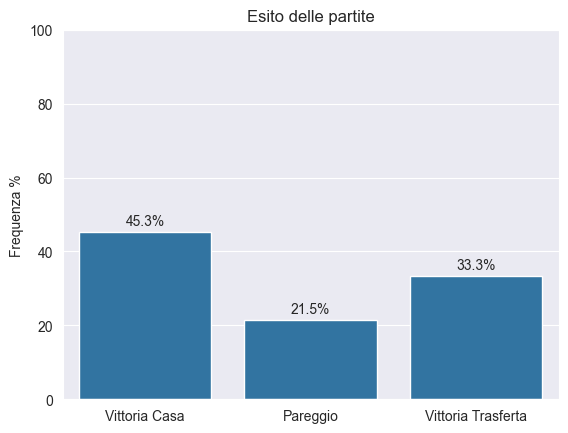

In [16]:
# percentuale di vittorie in casa, fuori casa e pareggi

#rimuove duplicati
club_games_df_unique = club_games_df.query('hosting == "Home"')

total_games = len(club_games_df_unique)

home_wins = len(club_games_df_unique.query('is_win == True'))/total_games*100
draws = len(club_games_df_unique.query('club_goals == opponent_goals'))/total_games*100
away_wins = len(club_games_df_unique.query('club_goals < opponent_goals'))/total_games*100

results_percentage_df = pd.DataFrame({
    'result': ['Vittoria Casa', 'Pareggio', 'Vittoria Trasferta'],
    'percentage': [home_wins, draws, away_wins]
})


ax = sns.barplot(data=results_percentage_df, x='result', y='percentage')

for i, (percentage, result) in enumerate(zip(results_percentage_df['percentage'], results_percentage_df['result'])):
    ax.text(i, percentage + 1, f"{percentage:.1f}%", ha='center', va='bottom')
    
plt.title('Esito delle partite')
plt.xlabel('')
plt.ylabel('Frequenza %')
plt.ylim(0,100)
plt.show()

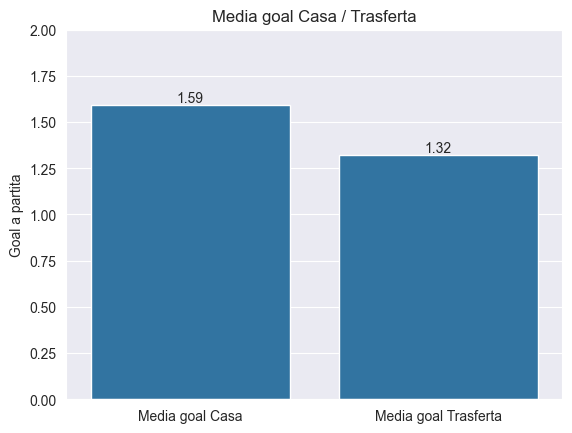

In [17]:
# media di goal casa-trasferta

home_goals = club_games_df_unique['club_goals'].sum()
away_goals = club_games_df_unique['opponent_goals'].sum()

avg_home_goals = home_goals / len(club_games_df_unique)
avg_away_goals = away_goals / len(club_games_df_unique)

avg_goals_df = pd.DataFrame({
    'hosting': ['Media goal Casa', 'Media goal Trasferta'],
    'average': [avg_home_goals, avg_away_goals]
})

ax = sns.barplot(data=avg_goals_df, x='hosting', y='average')

for index, row in avg_goals_df.iterrows():
    ax.text(index, row['average'], f"{row['average']:.2f}", ha='center', va='bottom')

plt.title('Media goal Casa / Trasferta')
plt.xlabel('')
plt.ylabel('Goal a partita')
plt.ylim(0,2)
plt.show()